### **MNIST Handwritten Digit Classification using Fully-Connected Neural Networks**

- View it in Google Colab here:
https://colab.research.google.com/drive/1IO3hnN9f-eAA2ANDCHGlBrZeeA4e0lM9?usp=sharing

### 1 - Install and Import required dependencies

In [27]:
# !pip install --upgrade --quiet pip matplotlib scikit-learn tensorflow keras

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
import keras
keras.__version__ # version 3.8.0

'3.8.0'

### 2 - Load and Normalize the *MNIST Handwritten Digits* dataset

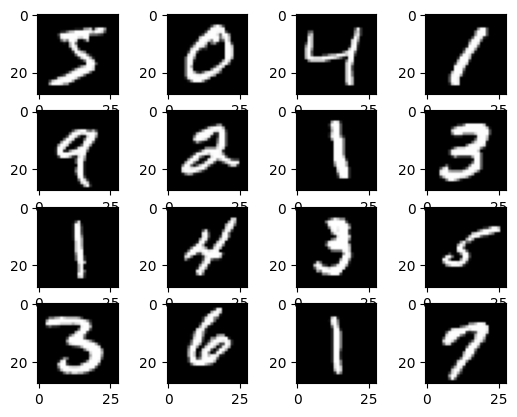


First 5 target values of training set:
 [5 0 4 1 9]

The corresponding one-hot vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


 ################################################## 

Training set: (60000, 784)  |   Training Targets: (60000,)
Test set: (10000, 784)      |   Test targets: (10000,)


In [29]:
def load_digits(show_sample = True):
    (x_train, y_train), (x_test, y_test) = mnist.load_data() # Load MNIST dataset

    if show_sample == True:
        nImg = 4
        for i in range(nImg*nImg):  # Display the first 16 images in the dataset
            plt.subplot(nImg, nImg, i+1)
            plt.imshow(x_train[i], cmap = 'Greys_r')
        plt.show()

    # Flatten the (28 x 28) images to (784 x 1) vectors
    x_train_1 = np.reshape(x_train, [x_train.shape[0], x_train.shape[1] * x_train.shape[2]])
    x_test_1 = np.reshape(x_test, [x_test.shape[0], x_test.shape[1] * x_test.shape[2]])

    return x_train_1, y_train, x_test_1, y_test

x_train_flat, y_train, x_test_flat, y_test = load_digits()

# Generate the one-hot vector for the labels
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

print('\nFirst 5 target values of training set:\n', y_train[:5])
print('\nThe corresponding one-hot vectors:\n', y_train_onehot[:5])

# Normalize the datasets
x_train_norm = x_train_flat / 255
x_test_norm = x_test_flat / 255

print('\n\n', '#'*50, '\n')
print('Training set: {}  |   Training Targets: {}'.format(x_train_norm.shape, y_train.shape))
print('Test set: {}      |   Test targets: {}'.format(x_test_norm.shape, y_test.shape))

### 3 - Build the Fully Connected Neural Network using Keras

In [30]:
model = models.Sequential()
model.add(layers.Dense(units=500, activation='relu'))
model.add(layers.Dense(units=250, activation='relu'))
model.add(layers.Dense(units=100, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

### 4 - Train the Neural Network

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy')

history = model.fit(x_train_norm, y_train_onehot, epochs=20, batch_size=100, validation_split=0.2)

Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4523 - val_loss: 0.1329
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0930 - val_loss: 0.1134
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0592 - val_loss: 0.0811
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0368 - val_loss: 0.1006
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0321 - val_loss: 0.0894
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0244 - val_loss: 0.1051
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0221 - val_loss: 0.1091
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0194 - val_loss: 0.0905
Epoch 9/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0180 - val_loss: 0.1005
Epoch 10/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0118 - val_loss: 0.1148
Epoch 11/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0181 - val_loss: 0.1091
Epoch 12/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

- **Plot the Training & Validation Loss**

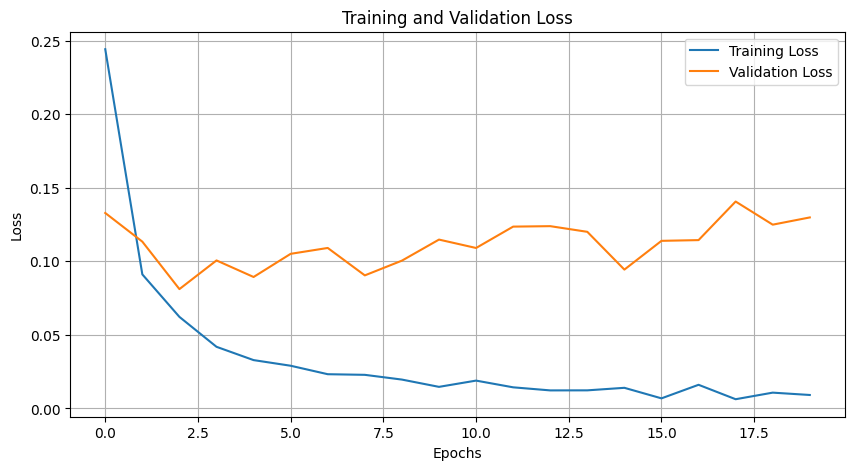

In [32]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### 5 - Evaluate the Neural Network

In [33]:
y_pred = model.predict(x_test_norm)

y_pred = np.argmax(y_pred, axis=1) # Choose highest probability of y_pred

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9818
Precision: 0.9818
Recall: 0.9818
F1-score: 0.9818


- **Compute and Plot the Confusion Matrix**

In [34]:
# # Compute confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Plot confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.show()
